### 데이터 불러오기 및 데이터 처리

### 학습 내용

In [1]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 30.2MB/s 
     |████████████████████████████████| 501kB 61.5MB/s 


In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-rc1


### keras.preprocessing을 사용한 데이터 불러오기

In [2]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)


228818944/228813984 [==============================] - 1s 0us/step


In [3]:
# 경로 지정
data_dir = pathlib.Path(data_dir)
print( type(data_dir) )
data_dir

<class 'pathlib.PosixPath'>


PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
# 꽃 종류의 이미지 개수
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [5]:
### 주어진 데이터의 파일및리스트(item)의 이름을 얻기
for item in data_dir.glob('*'):
  if item.name != "LICENSE.txt":
    print(item.name)

roses
dandelion
sunflowers
tulips
daisy


In [6]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['roses', 'dandelion', 'sunflowers', 'tulips', 'daisy'],
      dtype='<U10')

### 장미 이미지 3장 보기

In [0]:
import IPython.display as display
from PIL import Image

641


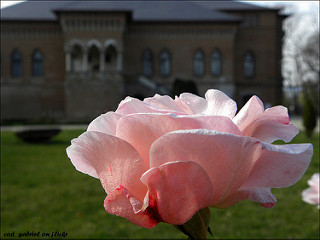

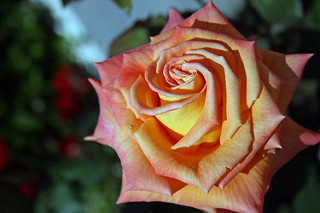

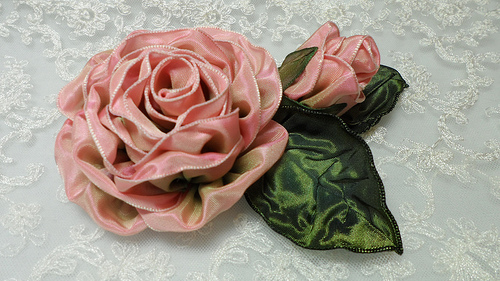

In [10]:
roses = list(data_dir.glob('roses/*'))
print(len(roses) ) # 장미 사진 개수
for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

### 이미지 데이터를 정규화

In [0]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
print(image_generator)
print( type(image_generator)   )

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [13]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
print(STEPS_PER_EPOCH)

115.0


In [0]:
### 5개의 클래스로 나눈다.

In [15]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,     # 32 배치사이즈
                                                     shuffle=True,              # shuffle 섞어서 처리.
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),  # 224, 224
                                                     classes = list(CLASS_NAMES))          # 클래스 지정 

Found 3670 images belonging to 5 classes.


In [0]:
import matplotlib.pyplot as plt

In [0]:
# image_generator에 의해 얻어진 image데이터와 label데이터셋의 이미지를 보여준다.
# 총 25개의 이미지 데이터
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

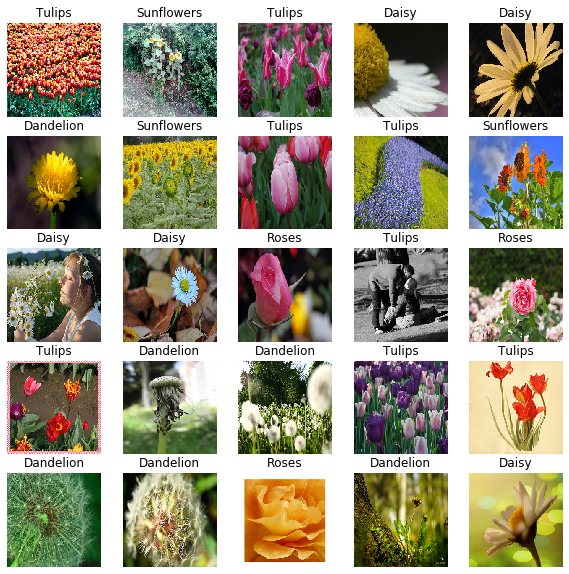

In [18]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

### REF
* image 데이터 처리 : https://www.tensorflow.org/tutorials/load_data/images